# PROYECTO FINAL
---
El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Esto, con el fin de implementar nuevas estrategias para aumentar la productividad de los operadores y a su vez la satisfacción en los clientes. 

### 1. Objetivo general; Identificar operadores ineficaces en telecomunicaciones
---

Criterios de ineficiencia:

 -Existe una gran cantidad de llamadas entrantes perdidas (internas y externas)

 -Tiempo de espera prolongado para las llamadas entrantes

 -Número reducido de llamadas salientes. 


### 2. Descripción de los datos 
---

Los datasets contienen información sobre el uso del servicio de telefonía virtual CallMeMaybe. Sus clientes son organizaciones que necesitan distribuir gran cantidad de llamadas entrantes entre varios operadores, o realizar llamadas salientes a través de sus operadores. Los operadores también pueden realizar llamadas internas para comunicarse entre ellos. Estas llamadas se realizan a través de la red de CallMeMaybe.

El conjunto de datos `telecom_clients_us.csv` tiene las siguientes columnas:

- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela

El dataset comprimido `telecom_dataset_us.csv` contiene las siguientes columnas:

- `user_id`: ID de la cuenta de cliente
- `date`: fecha en la que se recuperaron las estadísticas
- `direction`: "dirección" de llamada (`out` para saliente, `in` para entrante)
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: identificador del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: número de llamadas
- `call_duration`: duración de la llamada (sin incluir el tiempo de espera)
- `total_call_duration`: duración de la llamada (incluido el tiempo de espera)

 



### 3. Descarga de datos 
---

In [1]:
# Importación de librerías 
import pandas as pd
import numpy as np

from scipy.stats import pearsonr

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#Asignación de variable al dataset de clientes 
def load_data():
    try:
        # Intentar cargar los datos de la forma local
        clients = pd.read_csv('telecom_clients_us.csv', sep=',') # Reemplaza con la ruta local real
        return clients
    except FileNotFoundError:
        # Si la carga local falla, intentar la carga desde la instancia de revisión
        try:
            clients = pd.read_csv('/datasets/telecom_clients_us.csv', sep=',')
            return clients
        except FileNotFoundError:
            print("No se pudo encontrar el archivo en ninguna de las ubicaciones.")
            return None

# Llamar a la función para cargar los datos
clients = load_data()

In [3]:
# Visualización de dataset
clients.info()
clients.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16
5,167764,A,2019-09-30
6,167050,A,2019-08-29
7,168252,A,2019-10-17
8,168495,A,2019-10-28
9,167879,A,2019-10-03


In [4]:
#Asignación de variable al dataset de clientes 
def load_data():
    try:
        # Intentar cargar los datos de la forma local
        calls_data= pd.read_csv('telecom_dataset_us.csv', sep=',') # Reemplaza con la ruta local real
        return calls_data
    except FileNotFoundError:
        # Si la carga local falla, intentar la carga desde la instancia de revisión
        try:
            calls_data = pd.read_csv('/datasets/telecom_dataset_us.csv', sep=',')
            return calls_data
        except FileNotFoundError:
            print("No se pudo encontrar el archivo en ninguna de las ubicaciones.")
            return None

# Llamar a la función para cargar los datos
calls_data = load_data()

In [5]:
#Visualización de dataset
calls_data.info()
calls_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
5,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,False,2,3,29
6,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
7,166377,2019-08-05 00:00:00+03:00,in,False,NaN,True,6,0,35
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
9,166377,2019-08-06 00:00:00+03:00,in,False,NaN,True,4,0,62


### 4. Preprocesamiento de datos (EDA)
---

In [6]:
#Corrección de tipo de datos y búsqueda de valores ausentes y duplicados.
clients['date_start'] = pd.to_datetime(clients['date_start'], format='%Y-%m-%d')
print('Correción de tipo de datos:')
print(clients.dtypes)
print()
print('Número de valores duplicados:', clients.duplicated().sum())
print()
print("Número de valores ausentes:")
print(clients.isna().sum().to_string(index=True))

Correción de tipo de datos:
user_id                 int64
tariff_plan            object
date_start     datetime64[ns]
dtype: object

Número de valores duplicados: 0

Número de valores ausentes:
user_id        0
tariff_plan    0
date_start     0


Como podemos observar, se cambiaron los tipos de datos de la columna 'date' ya que estaban como tipo objeto cuando en realidad la columna representa fechas. Otra cosa que podemos notar en este dataframe es que, no existen valores duplicados ausentes, ni duplicados. 

In [7]:
#Corrección de tipo de datos y búsqueda de valores ausentes y duplicados.
calls_data['date'] = pd.to_datetime(calls_data['date'], utc=False)
calls_data['date'] = calls_data['date'].dt.tz_localize(None)
calls_data['internal'] = calls_data['internal'].astype('bool')
print('Correción de tipo de datos:')
print(calls_data.dtypes)
print('-----------------------------------------------')
print('Número de valores duplicados:', calls_data.duplicated().sum())
print('Porcentaje de valores duplicados:',100*((calls_data.duplicated().sum())/calls_data.shape[0]).round(2))
print('-----------------------------------------------')
print('Número de valores ausentes:')
print(calls_data.isna().sum().to_string(index=True))
print()
print('Porcentaje de valores ausentes:',100*((calls_data['operator_id'].isna().sum())/calls_data.shape[0]).round(2))

Correción de tipo de datos:
user_id                         int64
date                   datetime64[ns]
direction                      object
internal                         bool
operator_id                   float64
is_missed_call                   bool
calls_count                     int64
call_duration                   int64
total_call_duration             int64
dtype: object
-----------------------------------------------
Número de valores duplicados: 4900
Porcentaje de valores duplicados: 9.0
-----------------------------------------------
Número de valores ausentes:
user_id                   0
date                      0
direction                 0
internal                  0
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0

Porcentaje de valores ausentes: 15.0


En este segundo dataframe podemos observar varias cosas, se hizo el cambio de tipo de datos de las columnas 'date' y 'internal'. Así mismo, se buscaron el número de valores duplicados y ausentes, encontrando 4,900 duplicados alrededor del 9% de dataframe y 8,172 valores ausentes en la columna 'operator_id' siendo al rededor del 15% porciento del total de valores. 

En la siguiente celda, eliminaremos los valores duplicados y reemplazaremos los valores ausentes de la columna 'operato_id' por con el número 0, indicando que no hay registro de un ID del operador.

In [8]:
# Eliminación de duplicados y colocación de 0 en filas con valores ausentes
calls_data['operator_id'] = calls_data['operator_id'].fillna(0).astype('int')
calls_data['direction'] = calls_data['direction'].astype('category')
calls_data.drop_duplicates().reset_index(drop=True)
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53902 non-null  int64         
 1   date                 53902 non-null  datetime64[ns]
 2   direction            53902 non-null  category      
 3   internal             53902 non-null  bool          
 4   operator_id          53902 non-null  int64         
 5   is_missed_call       53902 non-null  bool          
 6   calls_count          53902 non-null  int64         
 7   call_duration        53902 non-null  int64         
 8   total_call_duration  53902 non-null  int64         
dtypes: bool(2), category(1), datetime64[ns](1), int64(5)
memory usage: 2.6 MB


In [9]:
# Calcular la diferencia del tiempo de espera por llamada
calls_data['waiting_time'] = calls_data['total_call_duration'] - calls_data['call_duration'] 
calls_data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waiting_time
0,166377,2019-08-04,in,False,0,True,2,0,4,4
1,166377,2019-08-05,out,True,880022,True,3,0,5,5
2,166377,2019-08-05,out,True,880020,True,1,0,1,1
3,166377,2019-08-05,out,True,880020,False,1,10,18,8
4,166377,2019-08-05,out,False,880022,True,3,0,25,25


In [10]:
#Analisis estadístico del dataframe 'calls_data'
calls_data.describe().T

,count,mean,min,25%,50%,75%,max,std
user_id,53902.0,167295.344477,166377.0,166782.0,167162.0,167819.0,168606.0,598.883775
date,53902,2019-10-23 01:00:32.191755264,2019-08-02 00:00:00,2019-10-04 00:00:00,2019-10-28 00:00:00,2019-11-14 00:00:00,2019-11-28 00:00:00,NaN
operator_id,53902.0,777581.369151,0.0,890416.0,906406.0,930020.0,973286.0,329292.849066
calls_count,53902.0,16.451245,1.0,1.0,4.0,12.0,4817.0,62.91717
call_duration,53902.0,866.684427,0.0,0.0,38.0,572.0,144395.0,3731.791202
total_call_duration,53902.0,1157.133297,0.0,47.0,210.0,902.0,166155.0,4403.468763
waiting_time,53902.0,290.44887,0.0,17.0,55.0,201.0,46474.0,1127.905654


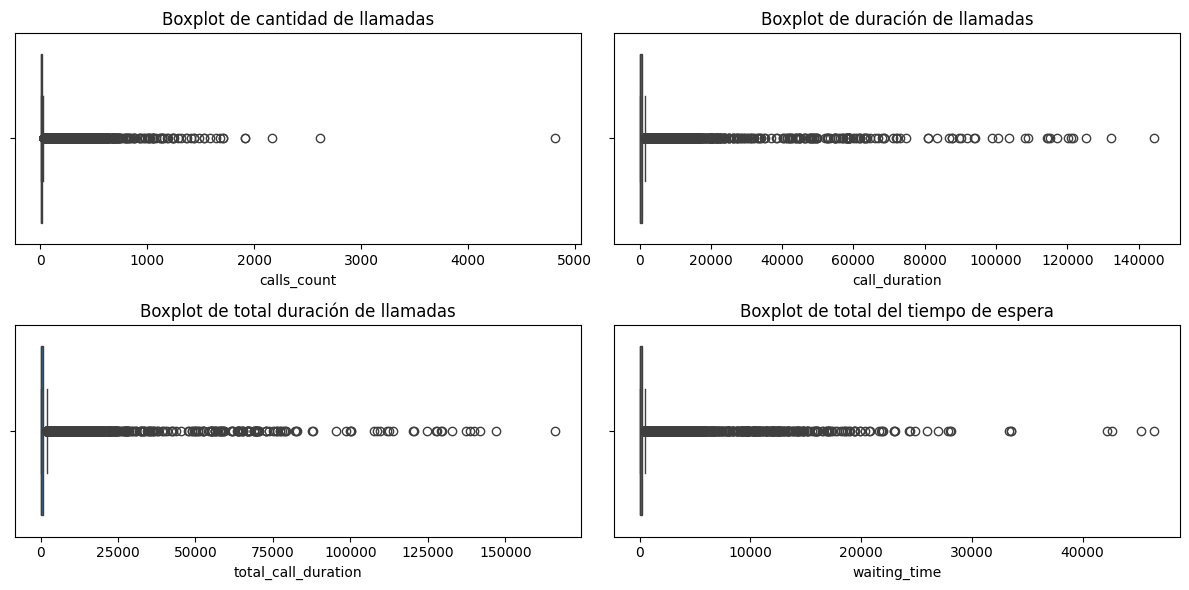

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.title('Boxplot de cantidad de llamadas')
sns.boxplot(x=calls_data['calls_count'])

plt.subplot(2, 2, 2)
plt.title('Boxplot de duración de llamadas')
sns.boxplot(x=calls_data['call_duration'])

plt.subplot(2, 2, 3)
plt.title('Boxplot de total duración de llamadas')
sns.boxplot(x=calls_data['total_call_duration'])

plt.subplot(2, 2, 4)
plt.title('Boxplot de total del tiempo de espera')
sns.boxplot(x=calls_data['waiting_time'])

plt.tight_layout()
plt.show()

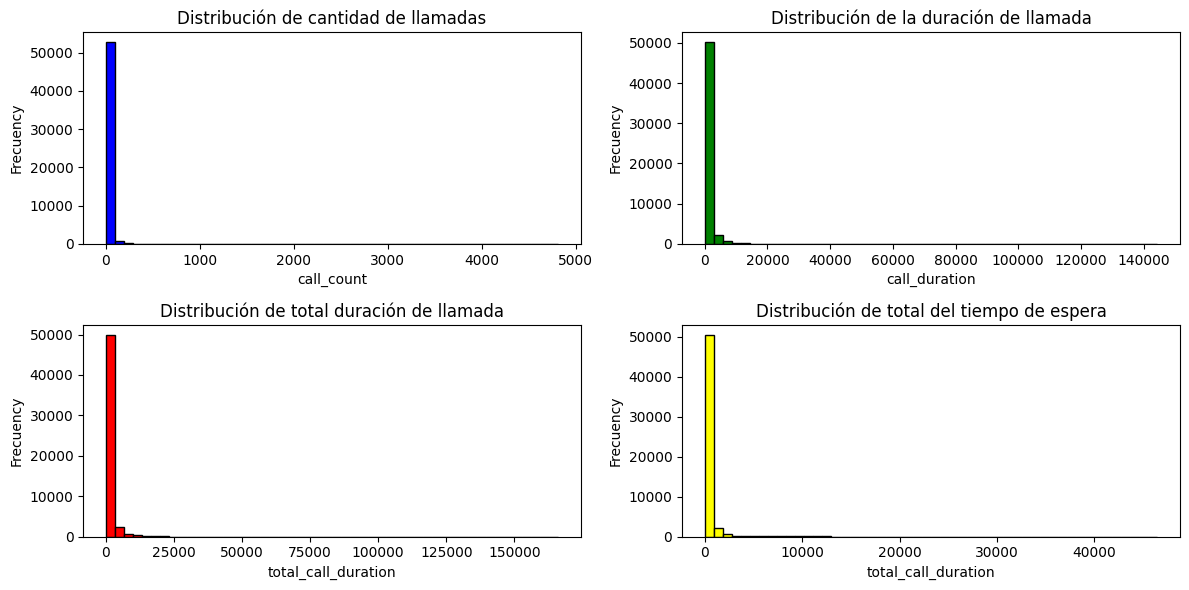

In [12]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(calls_data['calls_count'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución de cantidad de llamadas')
plt.xlabel('call_count')
plt.ylabel('Frecuency')

plt.subplot(2, 2, 2)
plt.hist(calls_data['call_duration'], bins=50, color='green', edgecolor='black')
plt.title('Distribución de la duración de llamada')
plt.xlabel('call_duration')
plt.ylabel('Frecuency')

plt.subplot(2, 2, 3)
plt.hist(calls_data['total_call_duration'], bins=50, color='red', edgecolor='black')
plt.title('Distribución de total duración de llamada')
plt.xlabel('total_call_duration')
plt.ylabel('Frecuency')

plt.subplot(2, 2, 4)
plt.hist(calls_data['waiting_time'], bins=50, color='yellow', edgecolor='black')
plt.title('Distribución de total del tiempo de espera')
plt.xlabel('total_call_duration')
plt.ylabel('Frecuency')

plt.tight_layout()
plt.show()

La visualización de los histogramas, nos permite verificar que hay una concentración en un rango especifico en cada gráfico en las variables comparadas. 

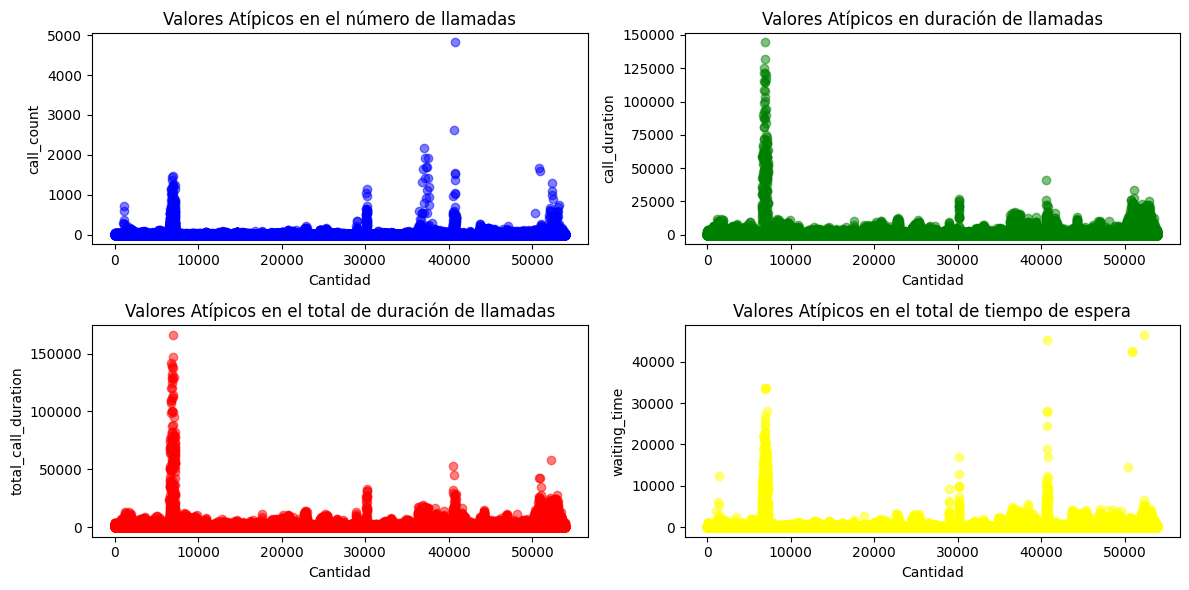

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.scatter(range(len(calls_data)), calls_data['calls_count'], alpha=0.5, color='blue')
plt.title('Valores Atípicos en el número de llamadas')
plt.xlabel('Cantidad')
plt.ylabel('call_count')

plt.subplot(2, 2, 2)
plt.scatter(range(len(calls_data)), calls_data['call_duration'], alpha=0.5, color='green')
plt.title('Valores Atípicos en duración de llamadas')
plt.xlabel('Cantidad')
plt.ylabel('call_duration')

plt.subplot(2, 2, 3)
plt.scatter(range(len(calls_data)), calls_data['total_call_duration'], alpha=0.5, color='red')
plt.title('Valores Atípicos en el total de duración de llamadas')
plt.xlabel('Cantidad')
plt.ylabel('total_call_duration')

plt.subplot(2, 2, 4)
plt.scatter(range(len(calls_data)), calls_data['waiting_time'], alpha=0.5, color='yellow')
plt.title('Valores Atípicos en el total de tiempo de espera')
plt.xlabel('Cantidad')
plt.ylabel('waiting_time')

plt.tight_layout()
plt.show()

En los 4 histogramas se observa una clara presencia de valores atípicos, es decir, datos que se desvían significativamente del resto. En el histograma de tiempo de espera, llama la atención que existen más valores atípicos fuera de los rangos que se ven en el resto de los gráficos. 

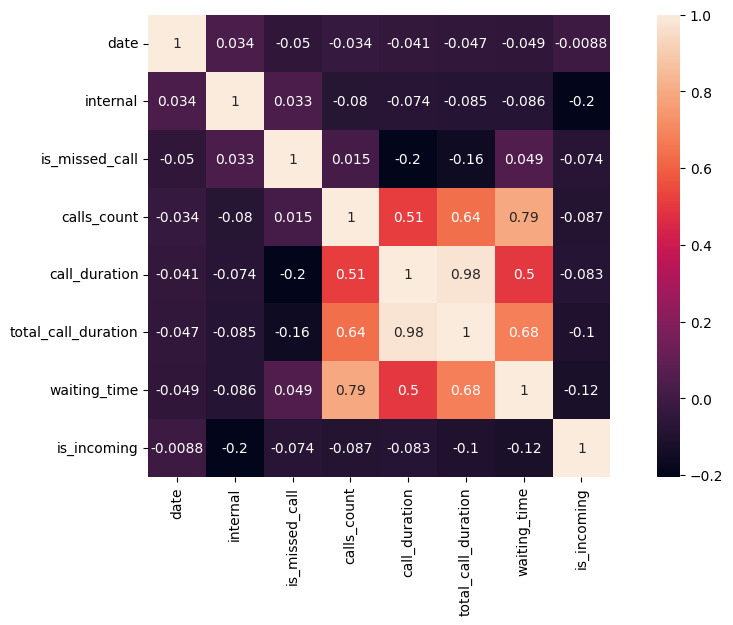

In [14]:
calls_data['is_incoming'] = (calls_data['direction'] == 'in').astype(int)

df= calls_data.drop(['direction','user_id','operator_id'], axis=1)
df_corr = df.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(df_corr, annot=True, square=True)
plt.show()

Correlación positiva fuerte:

-calls_count, call_duration y total_call_duration están fuertemente correlacionadas entre sí. Esto es lógico, ya que a mayor número de llamadas, mayor será la duración total de las llamadas.

Correlaciones moderadas:

-is_missed_call tiene una correlación positiva moderada con waiting_time. Esto sugiere que las llamadas perdidas tienden a tener tiempos de espera más largos.

-calls_count tiene una correlación positiva moderada con waiting_time. Esto podría indicar que a medida que aumenta el número de llamadas, también aumenta el tiempo de espera en promedio.


### 5. Identificar operadores ineficaces 
---

In [15]:
#Agregar columnas de fecha por mes y día
calls_data['month_call'] = calls_data['date'].dt.month
calls_data['day_call'] = calls_data['date'].dt.strftime('%d')

clients['month_start'] = clients['date_start'].dt.month
clients['day_start']= clients['date_start'].dt.strftime('%d')

# Unión de datasets
df_merged= pd.merge(calls_data, clients, on='user_id')

df_merged.head(3)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waiting_time,is_incoming,month_call,day_call,tariff_plan,date_start,month_start,day_start
0,166377,2019-08-04,in,False,0,True,2,0,4,4,1,8,04,B,2019-08-01,8,01
1,166377,2019-08-05,out,True,880022,True,3,0,5,5,0,8,05,B,2019-08-01,8,01
2,166377,2019-08-05,out,True,880020,True,1,0,1,1,0,8,05,B,2019-08-01,8,01


In [16]:
#Agrupar por operador y contar llamadas perdidas
missed_calls_per_operator = df_merged.groupby('operator_id').agg({'is_missed_call':'count'})
missed_calls_per_operator= missed_calls_per_operator.sort_values(by='is_missed_call', ascending=False).head(10)

print(missed_calls_per_operator)

labels = missed_calls_per_operator.index.to_list()
labels = [str(x) for x in labels]

fig = px.bar(missed_calls_per_operator, x=labels, y='is_missed_call',
            labels={ 'x':'ID del Operador', 'is_missed_call':'Llamadas Perdidas'},
            title='Cantidad de Llamadas Perdidas por Operador',
            color_discrete_sequence=px.colors.sequential.RdBu,
            template='simple_white')

plt.tight_layout()
fig.show()

             is_missed_call
operator_id                
0                      8172
901884                  348
901880                  337
893804                  325
885876                  319
891410                  290
887276                  289
891414                  277
885890                  277
905538                  269


<Figure size 640x480 with 0 Axes>

In [17]:
#Agrupar por mes y contar llamadas perdidas
missed_calls_per_month = df_merged.groupby('month_call').agg({'is_missed_call':'count'})
missed_calls_per_month= missed_calls_per_month.sort_values(by='is_missed_call', ascending=False)

print(missed_calls_per_month)

labels = missed_calls_per_month.index.to_list()
labels = [str(x) for x in labels]

fig = px.bar(missed_calls_per_month, x=labels, y='is_missed_call',
            labels={ 'x':'Mes', 'is_missed_call':'Llamadas Perdidas'},
            title='Cantidad de Llamadas Perdidas por Mes',
            color_discrete_sequence=px.colors.sequential.RdBu,
            template='simple_white')

plt.tight_layout()
fig.show()

            is_missed_call
month_call                
11                   23671
10                   18947
9                     9247
8                     2037


<Figure size 640x480 with 0 Axes>

In [18]:
#Calcular el operadores con mayor tiempo de espera
waiting_time_per_operator = df_merged.groupby('operator_id').agg({'waiting_time':'sum'})
waiting_time_per_operator= waiting_time_per_operator.sort_values(by= 'waiting_time', ascending=False).head(10)

print(waiting_time_per_operator)

labels = waiting_time_per_operator.index.to_list()
labels = [str(x) for x in labels]

fig = px.bar(waiting_time_per_operator, x=labels, y='waiting_time',
            labels={ 'x':'ID del Operador', 'waiting_time':'Tiempo de espera'},
            title='Tiempo de espera por operador',
            color_discrete_sequence=px.colors.sequential.RdBu,
            template='simple_white')

plt.tight_layout()
fig.show()


             waiting_time
operator_id              
885890            1586416
885876            1536381
0                 1370790
925922             466688
929428             372774
929426             225526
908640             179736
945286             155190
945302             154973
945278             137207


<Figure size 640x480 with 0 Axes>

In [19]:
#Calcular el operador con mayor número de espera
waiting_time_per_operator = df_merged.groupby('operator_id').agg({'waiting_time':'sum'})
waiting_time_per_operator= waiting_time_per_operator.sort_values(by= 'waiting_time', ascending=False).head(10)

print(waiting_time_per_operator)

labels = waiting_time_per_operator.index.to_list()
labels = [str(x) for x in labels]

fig = px.bar(waiting_time_per_operator, x=labels, y='waiting_time',
            labels={ 'x':'ID del Operador', 'waiting_time':'Tiempo de espera'},
            title='Tiempo de espera por operador',
            color_discrete_sequence=px.colors.sequential.RdBu,
            template='simple_white')

plt.tight_layout()
fig.show()


             waiting_time
operator_id              
885890            1586416
885876            1536381
0                 1370790
925922             466688
929428             372774
929426             225526
908640             179736
945286             155190
945302             154973
945278             137207


<Figure size 640x480 with 0 Axes>

In [20]:
#Calcular el mes con mayor tiempo de espera
waiting_time_per_month = df_merged.groupby('month_call').agg({'waiting_time':'sum'})
waiting_time_per_month= waiting_time_per_month.sort_values(by= 'waiting_time', ascending=False)

print(waiting_time_per_month)

labels = waiting_time_per_month.index.to_list()
labels = [str(x) for x in labels]

fig = px.bar(waiting_time_per_month, x=labels, y='waiting_time',
            labels={ 'x':'Mes', 'waiting_time':'Tiempo de espera'},
            title='Tiempo de espera por mes',
            color_discrete_sequence=px.colors.sequential.RdBu,
            template='simple_white')

plt.tight_layout()
fig.show()

            waiting_time
month_call              
10               6054165
11               5575034
9                3192239
8                 834337


<Figure size 640x480 with 0 Axes>

In [21]:
out_calls = calls_data[calls_data['direction'] == 'out']

# Agrupar por operador y contar las llamadas salientes
total_calls_out = out_calls.groupby('operator_id').size().reset_index(name='total_calls')
total_calls_out = total_calls_out.sort_values(by= 'total_calls', ascending=True)
print('Número minimo de llamadas salientes por operador:', total_calls_out['total_calls'].min())
print('Número máximo de llamadas salientes por operador:', total_calls_out['total_calls'].max())


inefficient_operators= total_calls_out[total_calls_out['total_calls'] <= 123]
inefficient_operators = len(inefficient_operators)
print('Número total de operadores ineficientes:', inefficient_operators)
print('Número total de llamadas salientes:', total_calls_out['total_calls'].count())

Número minimo de llamadas salientes por operador: 1
Número máximo de llamadas salientes por operador: 246
Número total de operadores ineficientes: 837
Número total de llamadas salientes: 883


Si consideramos que 246 es el número máximo de llamadas realizadas por un operador, tomar menos de 123 (la mitad) como ineficiente podría ser una simplificación excesiva. Esta métrica no considera la calidad de las llamadas, solo la cantidad.

Promedio de la duración de llamada: 1157.1332974657712


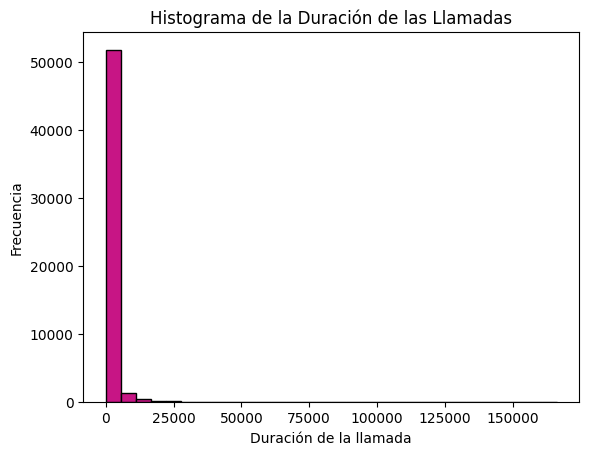

In [22]:
#Promedio de la duración de llamada 
mean= df_merged['total_call_duration'].mean()
print('Promedio de la duración de llamada:', mean)

#Histograma para la Duración de la Llamada
plt.hist(df_merged['total_call_duration'], bins=30, edgecolor='black', color= 'mediumvioletred')
plt.xlabel('Duración de la llamada')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Duración de las Llamadas')
plt.show()

In [23]:
#Proporción de llamadas internas y externas 
call_counts= df_merged.groupby('internal').agg({'operator_id':'count'})
call_counts.sort_values(by='operator_id', ascending=False)

#Creación del gráfico
labels = call_counts.index.to_list()
values = call_counts['operator_id'].values

df = px.data.tips()
fig = px.pie(df, values=values, names=labels, color_discrete_sequence=px.colors.sequential.RdBu, 
             title='Proporción de llamadas internas y externas')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [24]:
#Proporción de clientes por tipo de tarifa 
rate_counts= df_merged.groupby('tariff_plan').agg({'user_id':'count'})
rate_counts.sort_values(by='user_id', ascending=False)

#Creación del gráfico
labels = rate_counts.index.to_list()
values = rate_counts['user_id'].values

df = px.data.tips()
fig = px.pie(df, values=values, names=labels, color_discrete_sequence=px.colors.sequential.RdBu, 
             title='Proporción de clientes por tipo de tarifa')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### 6. Prueba de hipótesis
---

Hipótesis : El aumento en el volumen de llamadas genera un incremento en los tiempos de espera.
La correlación positiva entre calls_count y waiting_time indica que a medida que aumenta el número de llamadas, el sistema puede saturarse y los tiempos de espera se alargan.

H0: No existe una relación entre el número de llamadas y el tiempo de espera.

H1: A mayor número de llamadas, mayor tiempo de espera.


In [25]:
# Calcular el coeficiente de correlación de Pearson y el valor p
corr, p_value = pearsonr(df_merged['calls_count'], df_merged['waiting_time'])

# Imprimir los resultados
print("Coeficiente de correlación:", corr)
print("Valor p:", p_value)

# Si p_value < 0.05, se rechaza la hipótesis nula
if p_value < 0.05:
    print("Existe una correlación significativa entre el número de llamadas y el tiempo de espera.")
else:
    print("No se encontró una correlación significativa.")


Coeficiente de correlación: 0.7926548591828367
Valor p: 0.0
Existe una correlación significativa entre el número de llamadas y el tiempo de espera.


https://matplotlib.org/stable/gallery/color/named_colors.html